# Heart Attack


## Import and Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
# Importing Data Set
df=pd.read_csv('/kaggle/input/heart-1/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Check Row and Columns**

In [3]:

df.shape

(303, 14)

**Check Columns Name**

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

**Check Type and Null Values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Count Unique Values Of Variables**

In [6]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

**Descriptive Statictis**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Check Covariance Of Variables**

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

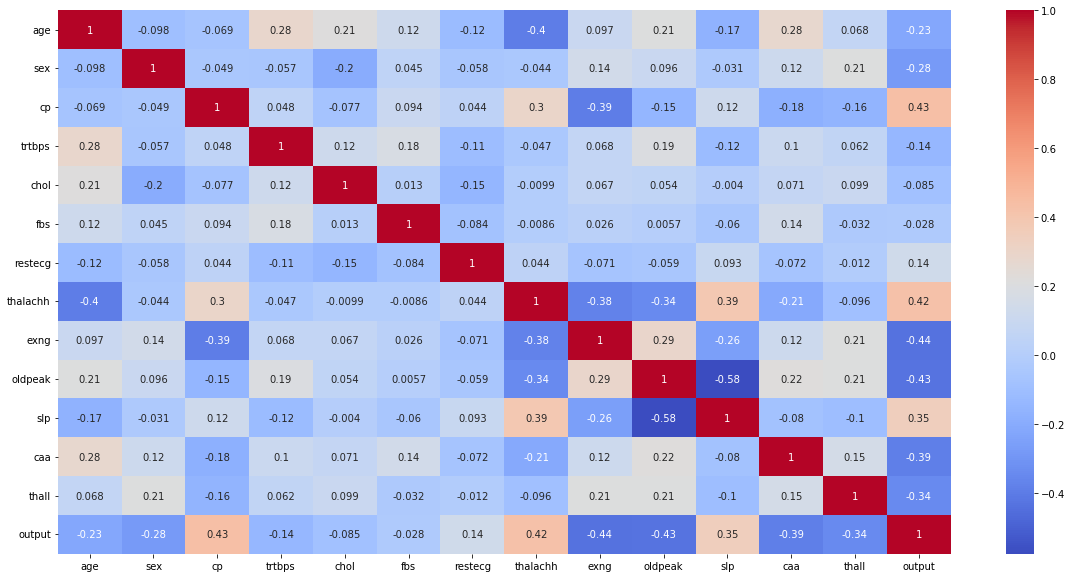

In [9]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

**Checking For Imbalance In The Output Class**

In [10]:
df.output.value_counts(normalize=True)


1    0.544554
0    0.455446
Name: output, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


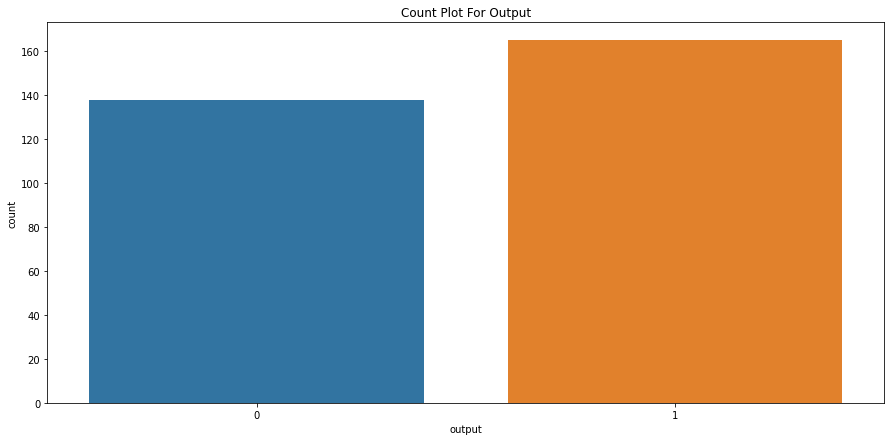

In [11]:
plt.figure(figsize=[15,7])
plt.title('Count Plot For Output')
sns.countplot(df['output'])
plt.show()

**Check Outlier DataFrame Using Boxplot**

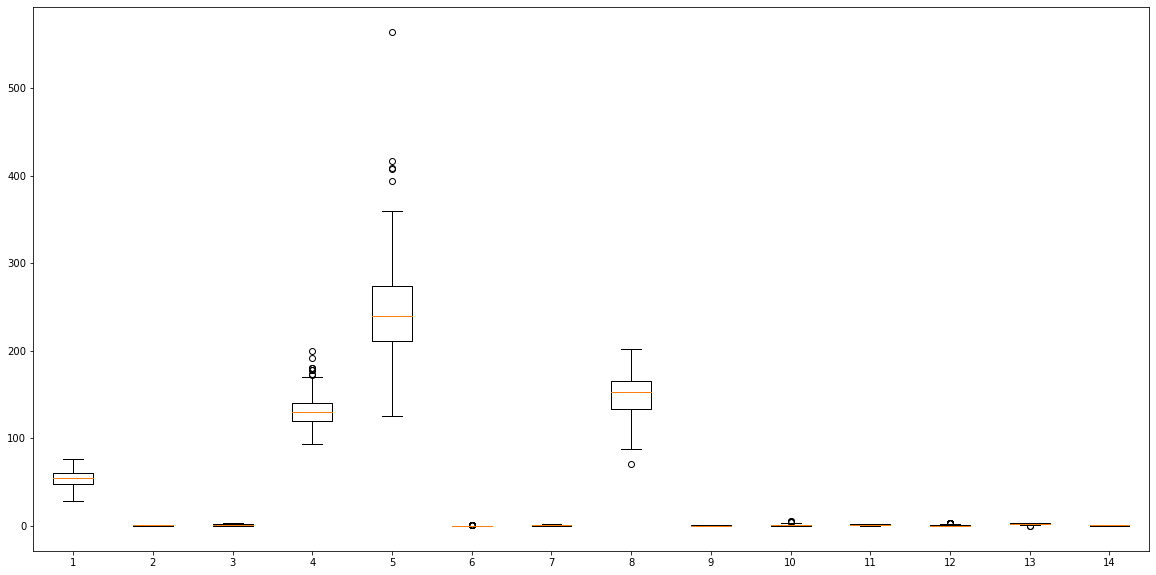

In [12]:
plt.subplots(figsize=(20,10))
plt.boxplot(df)
plt.show()

**Check The Patient's Condition By Age**

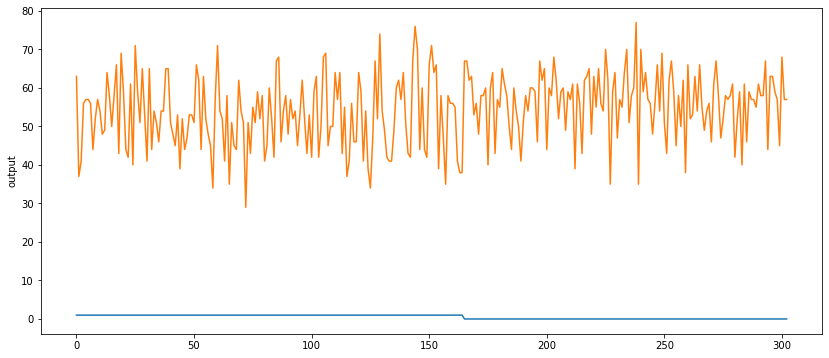

In [13]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df['output'])
sns.lineplot(data=df["age"])
plt.show()

**Preprocessing Before Building A Model**

In [14]:
x=df.drop('output',axis=1)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y=df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

## Logistic Regression

In [17]:
lg=LogisticRegression()

In [18]:
lg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [19]:
# Training Accuracy
lg.score(x_train,y_train)

0.8553719008264463

In [20]:
lg.score(x_train,y_train)

0.8553719008264463

In [21]:
pred_lg=lg.predict(x_test)

In [22]:
pred_lg

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [23]:
cm_lg=metrics.confusion_matrix(y_test,pred_lg)
print(cm_lg)

[[25  4]
 [ 3 29]]


<AxesSubplot:>

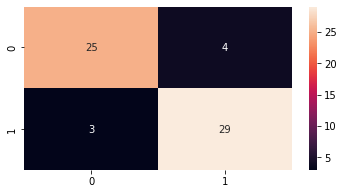

In [24]:
plt.subplots(figsize=(6,3))
sns.heatmap(cm_lg,annot=True)

In [25]:
tp,fn,fp,tn=cm_lg.reshape(-1)

In [26]:
tp

25

In [27]:
fn

4

In [28]:
fp

3

In [29]:
tn

29

**Accuracy**

In [30]:
accuracy=(tp+tn)/(tn+tp+fp+fn)
accuracy

0.8852459016393442

In [31]:
precision=tp/(tp+fp)
precision

0.8928571428571429

In [32]:
sensitivity=tp/(tp+fn)
sensitivity

0.8620689655172413

In [33]:
Specificity=tn/(tn+fp)
Specificity

0.90625

In [34]:
F1_Score=(precision+sensitivity)/2
F1_Score

0.8774630541871922

In [35]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [36]:
Logistic_Regression_Accuracy = accuracy_score(y_test, pred_lg)
Logistic_Regression_Accuracy

0.8852459016393442

# KNeighbors Classifier

In [37]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
pred_knn=knn.predict(x_test)

In [39]:
cm_knn=confusion_matrix(y_test,pred_knn)
cm_knn

array([[18, 11],
       [ 8, 24]])

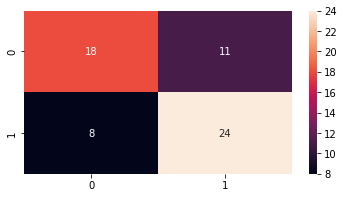

In [40]:
plt.figure(figsize=(6,3))
sns.heatmap(cm_knn,annot=True)
plt.show()

In [41]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [42]:
KNN_Accuracy=accuracy_score(y_test,pred_knn)
KNN_Accuracy

0.6885245901639344

## Random Forest Classifier

In [43]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
pred_rf=rf.predict(x_test)

In [45]:
cm_rf=confusion_matrix(y_test,pred_rf)


In [46]:
cm_rf

array([[25,  4],
       [ 7, 25]])

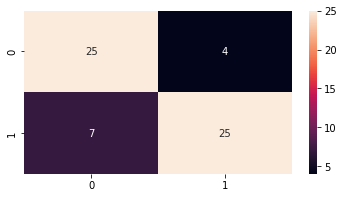

In [47]:
plt.figure(figsize=(6,3))
sns.heatmap(cm_rf,annot=True)
plt.show()

In [48]:
Random_Forest_Accuracy=accuracy_score(y_test,pred_rf)
Random_Forest_Accuracy

0.819672131147541

## Decision Tree Algorithm

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(x,y)

DecisionTreeClassifier()

[Text(0.5104166666666666, 0.9545454545454546, 'X[2] <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'X[11] <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'X[12] <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'X[8] <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'X[7] <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'X[4] <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'X[0] <= 61.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue 

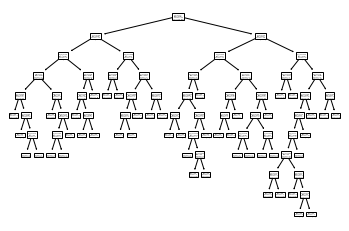

In [51]:
tree.plot_tree(dt)

[Text(0.5104166666666666, 0.9545454545454546, 'X[2] <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'X[11] <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'X[12] <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'X[8] <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'X[7] <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'X[4] <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'X[0] <= 61.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue 

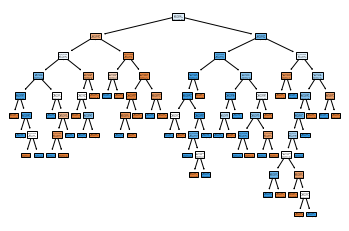

In [52]:
tree.plot_tree(dt, filled=True)

In [53]:
x.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

[Text(0.5104166666666666, 0.9545454545454546, 'cp <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'caa <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'thall <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'exng <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'thalachh <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'chol <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'age <= 61.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue =

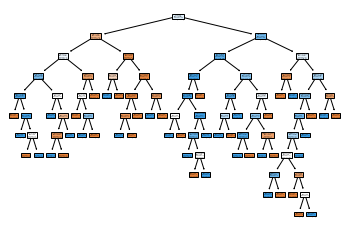

In [54]:
tree.plot_tree(dt,filled=True, feature_names=x.columns)

In [55]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
dt.score(x_train, y_train)

1.0

In [57]:
pred_dt=dt.predict(x_test)
pred_dt

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [58]:
print(confusion_matrix(y_test, pred_dt))

[[26  3]
 [ 8 24]]


<AxesSubplot:>

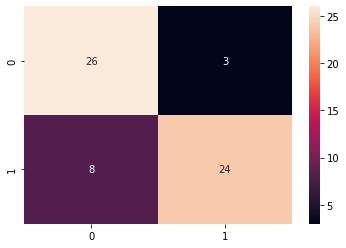

In [59]:
cm = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm,annot=True)

In [60]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [61]:
Decision_Tree_Accuracy = accuracy_score(y_test,pred_dt)
Decision_Tree_Accuracy

0.819672131147541

## Support Vector Machine

In [62]:
svm = SVC(kernel='linear')
# svm = SVC(kernel='rbf', gamma='auto')

In [63]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [64]:
svm.score(x_test, y_test)

0.8688524590163934

In [65]:
pred_svm = svm.predict(x_test)
pred_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [66]:
print(confusion_matrix(y_test, pred_svm))

[[25  4]
 [ 4 28]]


<AxesSubplot:>

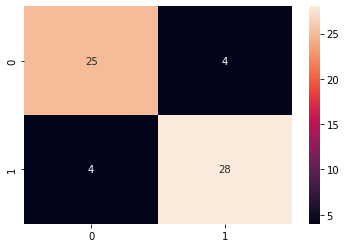

In [67]:
cm_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_svm,annot=True)

In [68]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [69]:
SVM_Accuracy = accuracy_score(y_test,pred_svm)
SVM_Accuracy

0.8688524590163934

## Summary of Machine Learning Algorithms

In [70]:
MLA= ['SVM_Accuracy','Decision_Tree_Accuracy','Random_Forest_Accuracy','KNN_Accuracy','Logistic_Regression_Accuracy']
Accuracy_Scores = [0.8688524590163934,0.819672131147541,0.819672131147541,0.6885245901639344,0.8852459016393442]

In [71]:
data=pd.DataFrame(list(zip(MLA, Accuracy_Scores)), columns =['ML', 'Accuracy'])
data

,ML,Accuracy
0,SVM_Accuracy,0.868852
1,Decision_Tree_Accuracy,0.819672
2,Random_Forest_Accuracy,0.819672
3,KNN_Accuracy,0.688525
4,Logistic_Regression_Accuracy,0.885246


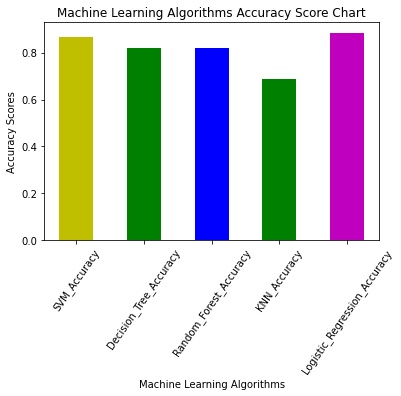

In [72]:
c = ['y','g','b','g','m']
plt.bar(MLA, Accuracy_Scores, width=0.5,color=c)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Machine Learning Algorithms Accuracy Score Chart')
plt.xticks(rotation=55)
plt.show()